In [17]:
import pandas as pd
import numpy as np
import json
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

In [18]:
x_src_path = '../../Dataset/MixedDataSet.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst.xlsx'

In [19]:
data = pd.read_json(x_src_path)
data = data.iloc[:, :-59022]

In [20]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [21]:
X = np.nan_to_num(data.values, nan=0, copy=True).astype(int)
y = plagiarised_array
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)

In [22]:
# nanCal = data.isna().sum(axis=1)
# print(np.mean(nanCal))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
#seed 32 results 100% on test score 24

In [24]:
count_0 = 0
count_1 = 0

for element in y_test:
    if element == 0:
        count_0 += 1
    elif element == 1:
        count_1 += 1

print("Number of 0s:", count_0)
print("Number of 1s:", count_1)

Number of 0s: 22
Number of 1s: 5


In [25]:
# for i in range(50):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
#     print("this stage is " + str(i))
#     count_y_train_1 = np.sum(y_train == 1)
#     count_y_test_1 = np.sum(y_test == 1)
#     print(count_y_train_1)
#     print(count_y_test_1)
#     print("")

In [26]:
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 0.9528301886792453
Test data score: 0.9259259259259259


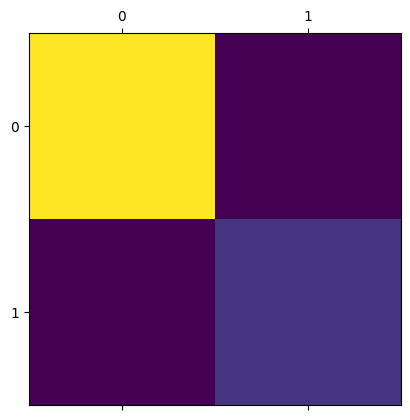

In [27]:
cm = confusion_matrix( p.predict(X_test), y_test)
# plt.set_cmap()
plt.matshow(cm)

In [28]:
# predictions = p.predict(X_test)
# for i in range(len(X_test)):
#     print("Predicted:", predictions[i], "Actual:", y_test[i])
y_pred = p.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.80      0.80      0.80         5

    accuracy                           0.93        27
   macro avg       0.88      0.88      0.88        27
weighted avg       0.93      0.93      0.93        27



In [29]:
predictions = p.predict(X_test)
for i in range(len(X_test)):
    print("Predicted:", predictions[i], "Actual:", y_test[i])
# y_pred = p.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# print(classification_report(y_test, y_pred))

Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0


In [30]:
from xgboost import XGBClassifier
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training data score: {train_accuracy}")
print(f"Test data score: {test_accuracy}")

xpredictions = model.predict(X_test)
for i in range(len(X_test)):
    print("Predicted:", xpredictions[i], "Actual:", y_test[i])
# y_pred = p.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# print(classification_report(y_test, y_pred))

Training data score: 1.0
Test data score: 0.9259259259259259
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0


In [31]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
print("model eval")
model.evaluate(X_test,y_test)

Epoch 1/5


4/4 [==============================] - 1s 51ms/step - loss: 8488.1406 - accuracy: 0.4340 - val_loss: 749.9326 - val_accuracy: 0.8889
Epoch 2/5
4/4 [==============================] - 0s 12ms/step - loss: 2188.3235 - accuracy: 0.8585 - val_loss: 482.0621 - val_accuracy: 0.8889
Epoch 3/5
4/4 [==============================] - 0s 12ms/step - loss: 744.5156 - accuracy: 0.7547 - val_loss: 98.0266 - val_accuracy: 0.8889
Epoch 4/5
4/4 [==============================] - 0s 11ms/step - loss: 556.8984 - accuracy: 0.8113 - val_loss: 108.5478 - val_accuracy: 0.7407
Epoch 5/5
4/4 [==============================] - 0s 12ms/step - loss: 562.3306 - accuracy: 0.7736 - val_loss: 3.2961e-17 - val_accuracy: 1.0000
model eval
1/1 [==============================] - 0s 22ms/step - loss: 3.2961e-17 - accuracy: 1.0000


[3.2960675794567844e-17, 1.0]

In [32]:
threshold = 0.5

y_pred_train_binary = np.where(y_pred_train >= threshold, 1, 0)
y_pred_test_binary = np.where(y_pred_test >= threshold, 1, 0)

y_pred_test_binary_flat = y_pred_test_binary.flatten()
for pred, actual, percep in zip(y_pred_test_binary_flat, xpredictions, y_test):
    print(f"Neural: {pred}, Perceptron: {percep} Actual: {actual}")

Neural: 0, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 1, Perceptron: 1 Actual: 1
Neural: 0, Perceptron: 1 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 1 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0
Neural: 1, Perceptron: 1 Actual: 1
Neural: 0, Perceptron: 0 Actual: 0
Neural: 0, Perceptron: 0 Actual: 0


In [33]:
modelNames = [
    '1d',
    '2d',
    '3d',
    '4d',
    '5d',
    '6d',
    '7d'
]

NODES_PER_HIDDEN_LAYER = 32
outputNode = 1
activationFun = 'sigmoid'

models = [ 

    keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(outputNode, activation=activationFun)
]),

    keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(outputNode, activation=activationFun)
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(outputNode, activation=activationFun)
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(outputNode, activation=activationFun)
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(outputNode, activation=activationFun)
]),

keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(outputNode, activation=activationFun)
]),

keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(outputNode, activation=activationFun)
])

]

In [34]:
LOSS_FN = keras.losses.BinaryCrossentropy()

for model in models:
    model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

In [35]:
TRAINING_EPOCHS = 5

# train all models
for model, name in zip(models, modelNames):
    print(f'training model {name}')
    model.fit(X_train, y_train, epochs=TRAINING_EPOCHS)


training model 1d
Epoch 1/5
4/4 [==============================] - 0s 3ms/step - loss: 2276.8811 - accuracy: 0.6887
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 4322.4424 - accuracy: 0.8585
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 2919.1245 - accuracy: 0.8774
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 1717.2379 - accuracy: 0.7736
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 852.8568 - accuracy: 0.7736
training model 2d
Epoch 1/5
4/4 [==============================] - 0s 5ms/step - loss: 7213.9014 - accuracy: 0.6415
Epoch 2/5
4/4 [==============================] - 0s 5ms/step - loss: 2860.7554 - accuracy: 0.8679
Epoch 3/5
4/4 [==============================] - 0s 5ms/step - loss: 1379.7999 - accuracy: 0.8679
Epoch 4/5
4/4 [==============================] - 0s 3ms/step - loss: 333.6773 - accuracy: 0.8491
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.6284 - accura

In [36]:
# get all model accuracy scores on test data
scores = [model.evaluate(X_test,y_test)[1] for model in models]

1/1 [==============================] - 0s 121ms/step - loss: 13.8221 - accuracy: 0.5926


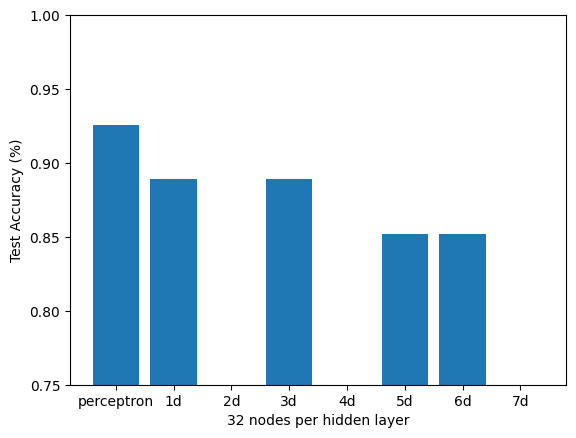

In [37]:
modelNames.insert(0, 'perceptron')
scores.insert(0, p.score(X_test, y_test) )

plt.bar(modelNames,scores)
plt.ylim(0.75, 1.0)
plt.ylabel('Test Accuracy (%)') 
plt.xlabel(str(NODES_PER_HIDDEN_LAYER) + " nodes per hidden layer")
plt.show()

In [38]:
probabilities = [model.predict(X_test) for model in models]

# Convert probabilities to class labels
predicted_labels = [np.argmax(prob, axis=1) for prob in probabilities]

# Assuming y_test is your actual labels
# Convert y_test to class labels if it's not already in that format
# This step depends on how y_test is structured. If it's one-hot encoded, you might need to use np.argmax(y_test, axis=1)

# Print predicted and actual labels for each model
for i, labels in enumerate(predicted_labels):
    print(f"Model {i+1} Predicted Labels: {labels}")
    print(f"Actual Labels: {y_test}")

1/1 [==============================] - 0s 59ms/step
Model 1 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Labels: [0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
Model 2 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Labels: [0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
Model 3 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Labels: [0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
Model 4 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Labels: [0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
Model 5 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Labels: [0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
Model 6 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Labels: [0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
Model 7 Predicted Labels: [0 0